In [1]:
#IMPORTING PACKAGAES######

from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
##READING IN DATA#####
#Reformatting data into a timeseries via converting string values to datetime values ####
#indexing that dataset with the time column#####

path = pd.read_csv(r"C:\Users\Vinnie\OneDrive\Desktop\owid-covid-data_wrangled.csv")
path.dropna()
path['date'] = pd.to_datetime(path['date'],infer_datetime_format=True)
indexedDataset = path.set_index(['date'])
indexedDataset.head(5)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-07-20,23691,607,571.714,1087,9,9.857,530.990,13.605,12.814,24.363,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
2020-07-21,24278,587,580.286,1100,13,10.286,544.147,13.157,13.006,24.654,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
2020-07-22,24872,594,586.000,1111,11,10.143,557.460,13.313,13.134,24.901,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
2020-07-23,25484,612,589.857,1124,13,10.286,571.177,13.717,13.221,25.192,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
2020-07-25,26764,605,602.143,1146,10,11.143,599.866,13.560,13.496,25.685,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748


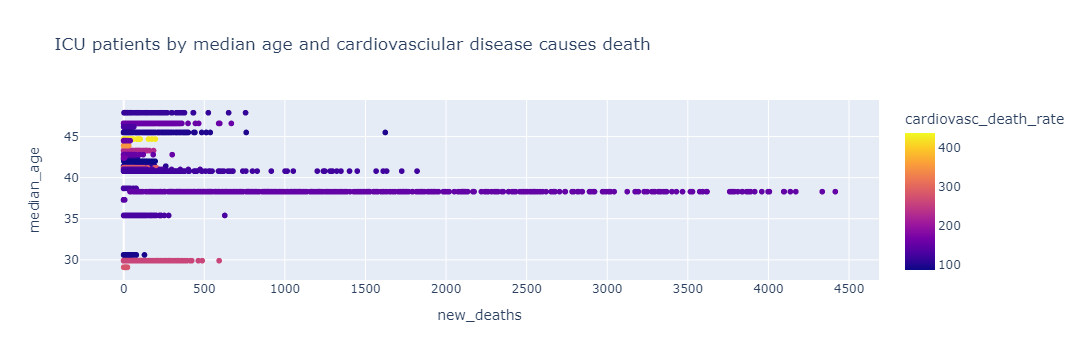

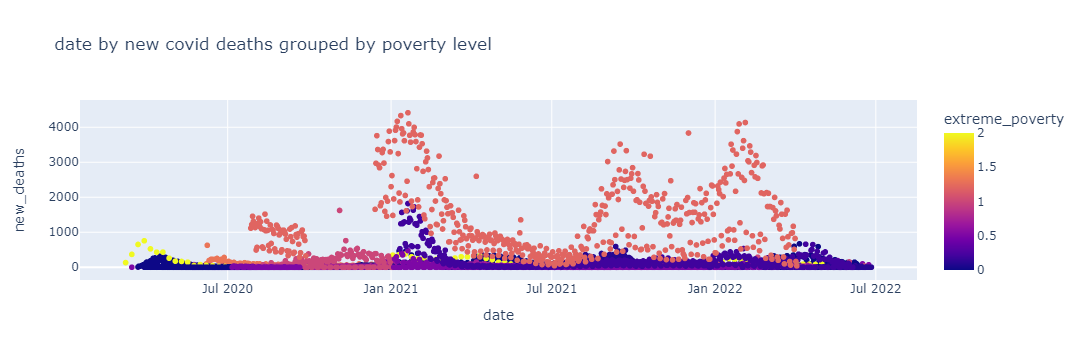

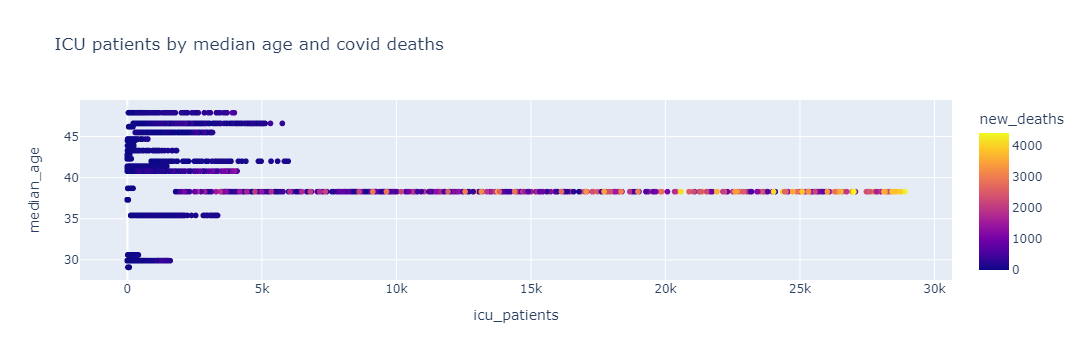

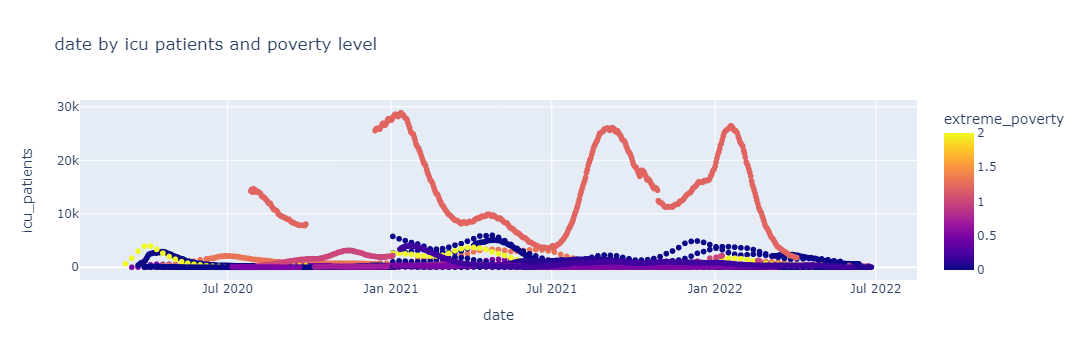

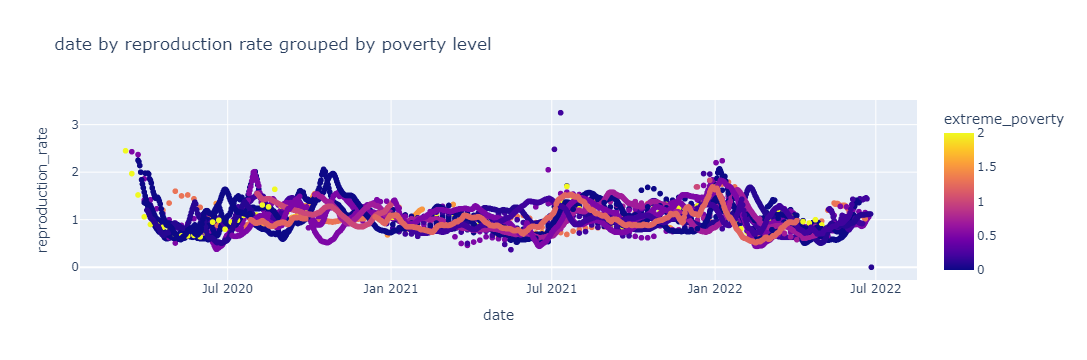

In [36]:
#PLOTTING New cases and New deaths overtime for visual refernce of distribution in a timeseries and setting pixelation dimensionality to 12 length units by 6 width units#####
fig = px.scatter(path, x="new_deaths", y="median_age", color='cardiovasc_death_rate', title="ICU patients by median age and cardiovasciular disease causes death")
(figsize:=(12,6))
fig.show()
                 
fig = px.scatter(path, x="date", y="new_deaths", color='extreme_poverty', title="date by new covid deaths grouped by poverty level")
(figsize:=(12,6))
fig.show()

fig = px.scatter(path, x="icu_patients", y="median_age", color='new_deaths', title="ICU patients by median age and covid deaths")
(figsize:=(12,6))
fig.show()
                 
fig = px.scatter(path, x="date", y="icu_patients", color='extreme_poverty', title="date by icu patients and poverty level")
(figsize:=(12,6))
fig.show()

fig = px.scatter(path, x="date", y="reproduction_rate", color='extreme_poverty', title="date by reproduction rate grouped by poverty level")
(figsize:=(12,6))
fig.show()

In [37]:
###Using numpy functions to calculate rolling mean and rolling standard deviation with a window of 21 hours then print#####
rolmean = indexedDataset.rolling(window=7).mean()
rolstd = indexedDataset.rolling(window=7).std()
print(rolmean,rolstd)

             total_cases     new_cases  new_cases_smoothed   total_deaths  \
date                                                                        
2020-07-20           NaN           NaN                 NaN            NaN   
2020-07-21           NaN           NaN                 NaN            NaN   
2020-07-22           NaN           NaN                 NaN            NaN   
2020-07-23           NaN           NaN                 NaN            NaN   
2020-07-25           NaN           NaN                 NaN            NaN   
...                  ...           ...                 ...            ...   
2022-03-30  7.997737e+07  30428.571429        30690.183429  980487.714286   
2022-03-31  8.000818e+07  30806.285714        30917.122286  981130.142857   
2022-04-01  8.003695e+07  28775.142857        30546.183571  981799.000000   
2022-04-02  8.006606e+07  29113.571429        30253.040714  982468.000000   
2022-04-03  8.009417e+07  28108.571429        29809.346714  983133.857143   

In [38]:
##First ADF statistical code format using Deaths (our variable we want to predict)####

def ad_test(path):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adfuller(path['reproduction_rate'])

(-12.917113847846284,
 3.9446957771834434e-24,
 26,
 7047,
 {'1%': -3.4312782934023067,
  '5%': -2.8619502315353094,
  '10%': -2.566988362226385},
 -15383.7845127834)

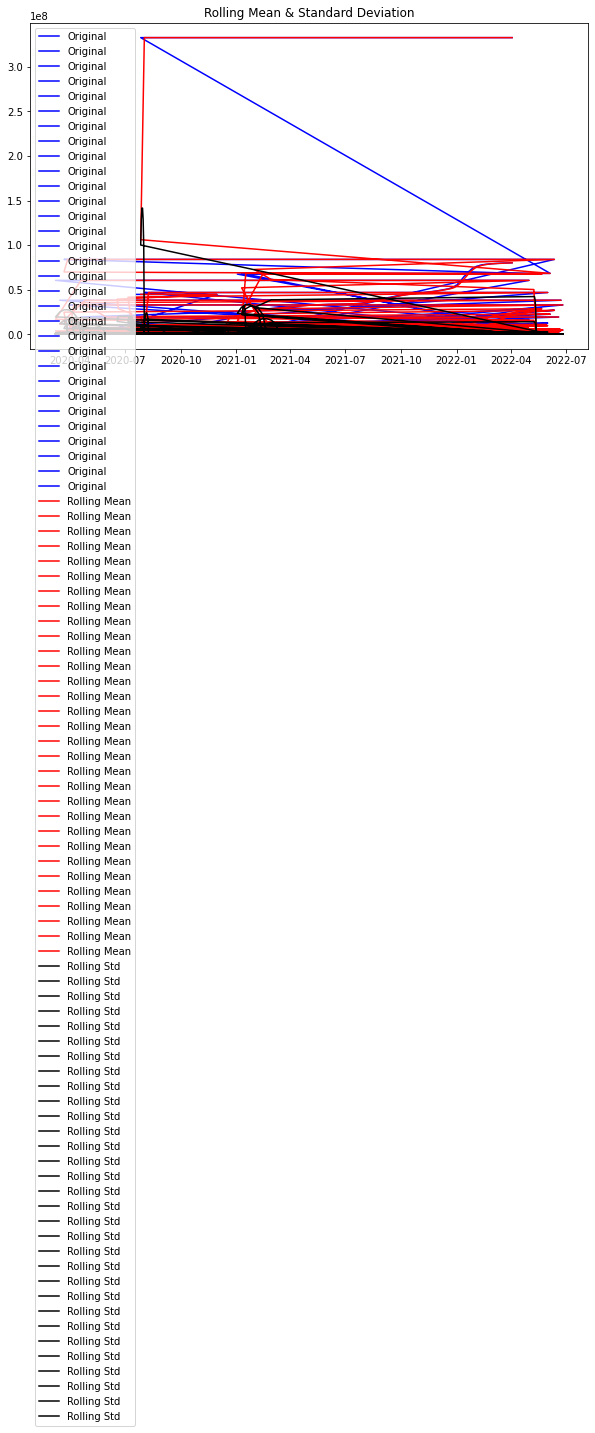

In [39]:
###Plotting mean and standard deviation of indexed dataset###
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [40]:
###Second Augmented Dickie format to check validity of first result####
##TEST STATISTIC IS EQUIVALENT TO FIRST TEST###
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['reproduction_rate'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.291711e+01
p-value                        3.944696e-24
#Lags Used                     2.600000e+01
Number of Observations Used    7.047000e+03
Critical Value (1%)           -3.431278e+00
Critical Value (5%)           -2.861950e+00
Critical Value (10%)          -2.566988e+00
dtype: float64


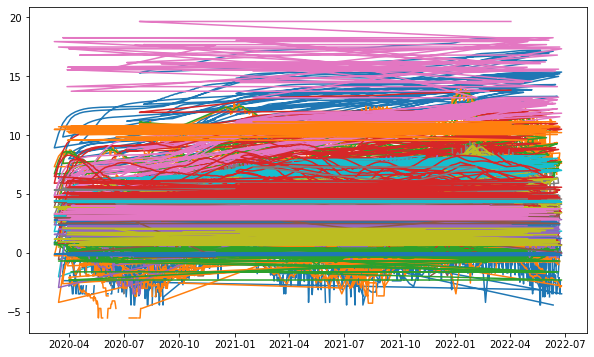

In [41]:
###LOGARITHMICALLY SCALING THE DATASET TO CHECK FOR STATIONARITY in visuals#####

indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

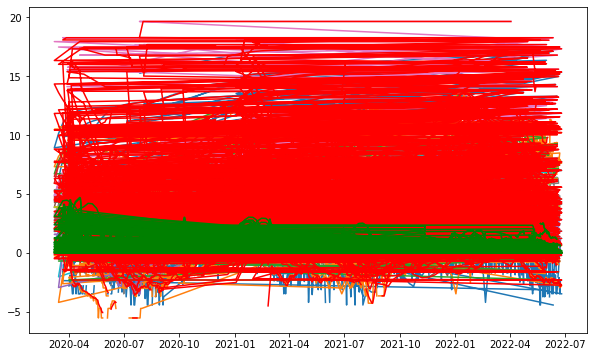

In [42]:
####DEVELOPING A STATIONARITY SERIES IN LOGARITHMIC FORM###
movingAverage = indexedDataset_logScale.rolling(window=7).mean()
movingSTD = indexedDataset_logScale.rolling(window=7).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='green')

In [43]:
###STEPWISE FITTING THE ARIMA MODEL FOR New Deaths ###

from pmdarima import auto_arima
stepwise_fit = auto_arima(path['reproduction_rate'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-15259.827, Time=4.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1746.334, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-15041.714, Time=1.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5788.313, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20974.147, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-15258.771, Time=3.87 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-15261.626, Time=2.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15222.020, Time=2.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-15190.416, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-15259.797, Time=3.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-15245.574, Time=0.63 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-15258.150, Time=4.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-15069.981, Time=1.58 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 26.331 seconds

In [44]:
##DEFINING THE TRAIN AND TEST FEATURES OF ARIMA TO 21 HOURS WINDOW DURATION
print(path.shape)
train=path.iloc[:-7]
test=path.iloc[-7:]
print(train.shape,test.shape)

(7074, 32)
(7067, 32) (7, 32)


In [45]:
####MODEL SUMMARY OF COVID ARIMA MODEL###
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['reproduction_rate'], order = (1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      reproduction_rate   No. Observations:                 7067
Model:                 ARIMA(1, 0, 5)   Log Likelihood                7624.966
Date:                Wed, 29 Jun 2022   AIC                         -15233.933
Time:                        16:57:44   BIC                         -15179.027
Sample:                             0   HQIC                        -15215.022
                               - 7067                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0298      0.025     40.761      0.000       0.980       1.079
ar.L1          0.9454      0.007    129.633      0.000       0.931       0.960
ma.L1          0.1623      0.007     24.494      0.000       0.149       0.175
ma.L2         -0.0768      0.006    -12.464      0.000      -0.089      -0.065
ma.L3          0.0154      0.007      2.272      0.023       0.002       0.029
ma.L4         -0.0126      0.009     -1.401      0.161      -0.030       0.005
ma.L5         -0.0040      0.008     -0.487      0.627      -0.020       0.012
sigma2         0.0068   2.52e-05    268.560      0.000       0.007       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          14539789.98
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                       225.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

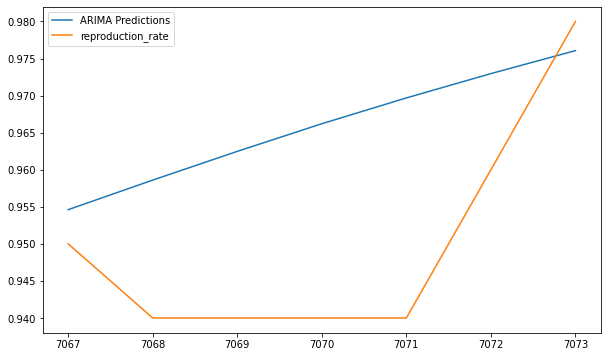

In [46]:
###Plotting ARIMA prediction###
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['reproduction_rate'].plot(legend=True)

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['reproduction_rate'].mean()
rmse=sqrt(mean_squared_error(pred,test['reproduction_rate']))
print(rmse)

0.01936084322473554
